In [ ]:
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas_datareader as web
import statsmodels.api as sm
import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install stockstats
from stockstats import StockDataFrame

In [ ]:
!pip install investpy
import investpy

In [ ]:
#data = investpy.get_index_historical_data(index='BIST 100',country='Turkey',from_date='01/01/2020',to_date='30/01/2021') # BİST100 için geçmiş datayı alır
#data = investpy.get_stock_historical_data(stock='PETKM', country='Turkey', from_date='01/01/2020', to_date='30/01/2021') # Hisselerde geçmiş datayı alır
#data = investpy.pivot_points(name='PETKM', country='Turkey', product_type='stock', interval='daily') # günlük haftalık destek ve direnç noktalarını gösterir
#data = investpy.technical_indicators(name='PETKM', country='Turkey', product_type='stock', interval='weekly')  # indicatorlere göre al sat tavsiyesi
#data = investpy.moving_averages(name='PETKM', country='Turkey', product_type='stock', interval='daily') # günlük ortalama değerleri (SMA,EMA )
#data = investpy.economic_calendar() # ekomomik haberlerde piyasa hareketine bakar
#data

In [ ]:
#indeks = investpy.get_indices_list(country='United States')
#indeks

In [ ]:
today = datetime.date.today()
today = today.strftime("%d/%m/%Y")

print("start_day",today)
THY = investpy.get_stock_historical_data(stock="THYAO", country='Turkey', from_date='01/01/2012', to_date=today)
XU_100 = investpy.get_index_historical_data(index='BIST 100',country='Turkey',from_date='01/01/2012',to_date=today) # BİST100 için geçmiş datayı alır
DAX= investpy.get_index_historical_data(index='DAX',country='germany',from_date='01/01/2012',to_date=today) #DAX endeks_Alaman
Nasdaq_100= investpy.get_index_historical_data(index='Nasdaq 100',country='United States',from_date='01/01/2012',to_date=today) #Nasdaq
S_P_500= investpy.get_index_historical_data(index='S&P 500',country='United States',from_date='01/01/2012',to_date=today) #S_P_500
DOW= investpy.get_index_historical_data(index='DOW 30',country='United States',from_date='01/01/2012',to_date=today) #Dow Jones 30
Shanghai= investpy.get_index_historical_data(index='Shanghai',country='china',from_date='01/01/2012',to_date=today) #Shanghai Çin
HangSeng= investpy.get_index_historical_data(index='Hang Seng',country='Hong Kong',from_date='01/01/2012',to_date=today) #Hong Kong Çin
VIX = investpy.get_index_historical_data(index='S&P 500 VIX',country='United States',from_date='01/01/2012',to_date=today) #Japon indeksi

DXY = investpy.get_index_historical_data(index='US Dollar Index',country='United States',from_date='01/01/2012',to_date=today) #US Dollar Index
FTSE_100 = investpy.get_index_historical_data(index='FTSE 100',country='United Kingdom',from_date='01/01/2012',to_date=today) #London FTSE 100
Brent_Oil = investpy.get_commodity_historical_data(commodity='Brent Oil', from_date='01/01/2012', to_date=today) # Brent Petrol
Gold = investpy.get_commodity_historical_data(commodity='gold', from_date='01/01/2012', to_date=today) # Altın

stocks = StockDataFrame.retype(THY[["Open", "Close", "High", "Low", "Volume"]])
  
#df1=df
#df.to_csv("THYAO.csv")
#df1 = pd.read_csv("THYAO.csv")
"""
XU_100.to_csv("XU_100.csv")
XU_100 = pd.read_csv("XU_100.csv")

Nasdaq_100.to_csv("Nasdaq_100.csv")
Nasdaq_100 = pd.read_csv("Nasdaq_100.csv")
"""


start_day 09/04/2021


'\nXU_100.to_csv("XU_100.csv")\nXU_100 = pd.read_csv("XU_100.csv")\n\nNasdaq_100.to_csv("Nasdaq_100.csv")\nNasdaq_100 = pd.read_csv("Nasdaq_100.csv")\n'

In [ ]:
USD_10_Yillik_faiz= investpy.get_bond_historical_data(bond='U.S. 10Y', from_date='01/01/2012', to_date=today)
USD_2_Yillik_faiz = investpy.get_bond_historical_data(bond='U.S. 2Y', from_date='01/01/2012', to_date=today)

#USD TL 
TL_USD = investpy.get_currency_cross_historical_data(currency_cross='USD/TRY', from_date='01/01/2012', to_date=today)

TL_EUR = investpy.get_currency_cross_historical_data(currency_cross='EUR/TRY', from_date='01/01/2012', to_date=today)



In [ ]:
New_index = XU_100.index
New_index1 = Nasdaq_100.index
New_index_2 =New_index.intersection(New_index1)

DAX_index = DAX.index
New_index_3 =New_index_2.intersection(DAX_index)

S_P_500_index = S_P_500.index
New_index_4 =New_index_3.intersection(S_P_500_index)

DOW_index = DOW.index
New_index_5 =New_index_4.intersection(DOW_index)

Shanghai_index = Shanghai.index
New_index_6 =New_index_5.intersection(Shanghai_index)

HangSeng_index = HangSeng.index
New_index_7 =New_index_6.intersection(HangSeng_index)

USD_10_Yillik_faiz_index = USD_10_Yillik_faiz.index
New_index_8 =New_index_7.intersection(USD_10_Yillik_faiz_index)

USD_1_Yillik_faiz_index = USD_2_Yillik_faiz.index
New_index_9 =New_index_8.intersection(USD_1_Yillik_faiz_index)

VIX_index =VIX.index
New_index_10 =New_index_9.intersection(VIX_index)

TL_USD_index =TL_USD.index
New_index_11 =New_index_10.intersection(TL_USD_index)

TL_EUR_index =TL_EUR.index
New_index_12 =New_index_11.intersection(TL_EUR_index)

DXY_index =DXY.index
New_index_13 =New_index_12.intersection(DXY_index)

FTSE_100_index =FTSE_100.index
New_index_14 =New_index_13.intersection(FTSE_100_index)

Brent_Oil_index =Brent_Oil.index
New_index_15 =New_index_14.intersection(Brent_Oil_index)

Gold_index =Gold.index
New_index_16 =New_index_15.intersection(Gold_index)


In [ ]:
Borsa= pd.DataFrame(data=XU_100['Open'][New_index_16].values, index=New_index_16, columns=['XU100']) # Açılış Tahminleniyor
Borsa['Nasdaq_100'] = Nasdaq_100['Close'][New_index_16].values
Borsa['DAX'] = DAX['Close'][New_index_16].values
Borsa['DOW'] = DOW['Close'][New_index_16].values
Borsa['S_P_500'] = S_P_500['Close'][New_index_16].values
Borsa['Shanghai'] = Shanghai['Close'][New_index_16].values
Borsa['HangSeng'] = HangSeng['Close'][New_index_16].values
Borsa['USD_10Y'] = USD_10_Yillik_faiz['Close'][New_index_16].values
Borsa['USD_2Y'] = USD_2_Yillik_faiz['Close'][New_index_16].values
Borsa['S_P_500_VIX'] = VIX['Close'][New_index_16].values
Borsa['TL_USD'] = TL_USD['Close'][New_index_16].values
Borsa['TL_EUR'] = TL_EUR['Close'][New_index_16].values
Borsa['DXY'] = DXY['Close'][New_index_16].values
Borsa['FTSE_100'] = FTSE_100['Close'][New_index_16].values
Borsa['Brent_Oil'] = Brent_Oil['Close'][New_index_16].values
Borsa['Gold'] = Gold['Close'][New_index_16].values




Borsa.corr()

# Türk

,XU100,Nasdaq_100,DAX,DOW,S_P_500,Shanghai,HangSeng,USD_10Y,USD_2Y,S_P_500_VIX,TL_USD,TL_EUR,DXY,FTSE_100,Brent_Oil,Gold
XU100,1.000000,0.895027,0.825485,0.893637,0.904204,0.505270,0.765231,-0.277536,0.275617,0.178239,0.799392,0.817476,0.411786,0.432554,-0.484599,0.387563
Nasdaq_100,0.895027,1.000000,0.811298,0.945964,0.975602,0.483640,0.633052,-0.419447,0.232148,0.351817,0.962344,0.970394,0.508413,0.280800,-0.568897,0.475936
DAX,0.825485,0.811298,1.000000,0.896250,0.899847,0.694426,0.799570,-0.041994,0.497952,-0.027956,0.752897,0.733265,0.703761,0.696422,-0.670140,0.003665
DOW,0.893637,0.945964,0.896250,1.000000,0.987860,0.492760,0.783114,-0.183499,0.496969,0.179636,0.931320,0.927893,0.590123,0.534717,-0.560452,0.279385
S_P_500,0.904204,0.975602,0.899847,0.987860,1.000000,0.530457,0.729920,-0.272955,0.383864,0.228483,0.942971,0.941304,0.595009,0.462349,-0.607163,0.315334
Shanghai,0.505270,0.483640,0.694426,0.492760,0.530457,1.000000,0.516009,-0.182665,0.217593,0.034832,0.415166,0.369160,0.714026,0.339055,-0.733877,-0.077213
HangSeng,0.765231,0.633052,0.799570,0.783114,0.729920,0.516009,1.000000,0.202368,0.635167,-0.100988,0.579907,0.587946,0.383449,0.759415,-0.288849,0.039403
USD_10Y,-0.277536,-0.419447,-0.041994,-0.183499,-0.272955,-0.182665,0.202368,1.000000,0.561306,-0.540704,-0.397236,-0.388925,-0.140385,0.515364,0.364836,-0.734797
USD_2Y,0.275617,0.232148,0.497952,0.496969,0.383864,0.217593,0.635167,0.561306,1.000000,-0.227685,0.328080,0.293371,0.496262,0.723072,-0.255087,-0.382121
S_P_500_VIX,0.178239,0.351817,-0.027956,0.179636,0.228483,0.034832,-0.100988,-0.540704,-0.227685,1.000000,0.426943,0.425097,0.140623,-0.519419,-0.308052,0.422593


In [ ]:
Borsa.tail()

,XU100,Nasdaq_100,DAX,DOW,S_P_500,Shanghai,HangSeng,USD_10Y,USD_2Y,S_P_500_VIX,TL_USD,TL_EUR,DXY,FTSE_100,Brent_Oil,Gold
Date,,,,,,,,,,,,,,,,
2021-03-30,1392.84,12896.53,15008.61,33066.96,3958.55,3456.68,28577.50,1.710,0.148,19.61,8.3312,9.7592,93.30,6772.12,64.14,1683.9
2021-03-31,1397.47,13091.44,15008.34,32981.55,3972.89,3441.91,28378.35,1.744,0.162,19.40,8.2439,9.6684,93.23,6713.63,63.54,1713.8
2021-04-01,1399.34,13329.51,15107.17,33153.21,4019.87,3466.33,28938.74,1.673,0.162,17.33,8.1036,9.5420,92.93,6737.30,64.86,1726.5
2021-04-07,1420.94,13616.70,15176.36,33446.26,4079.95,3479.63,28674.80,1.679,0.155,17.16,8.1310,9.6515,92.42,6885.32,63.16,1740.1
2021-04-08,1422.22,13758.50,15202.68,33503.57,4097.17,3482.55,29016.37,1.626,0.151,16.95,8.1281,9.6822,92.08,6942.22,63.20,1756.8


In [ ]:
  
Borsa.to_excel("All_data.xlsx")


"""
idx1 = pd.Index([1, 2, 3, 4]) 
idx2 = pd.Index([3, 4, 5, 6])
idx1.intersection(idx2)
Int64Index([3, 4], dtype='int64')
This returns a new Index with elements common to the index and other.
"""

"\nidx1 = pd.Index([1, 2, 3, 4]) \nidx2 = pd.Index([3, 4, 5, 6])\nidx1.intersection(idx2)\nInt64Index([3, 4], dtype='int64')\nThis returns a new Index with elements common to the index and other.\n"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#df = pd.read_csv('All_data.csv')
df = pd.read_excel("All_data.xlsx",sheet_name="Sheet1")
#test = df.tail(1)
#df =df.iloc[:-1]
df.tail()



,Date,XU100,Nasdaq_100,DAX,DOW,S_P_500,Shanghai,HangSeng,USD_10Y,USD_2Y,S_P_500_VIX,TL_USD,TL_EUR,DXY,FTSE_100,Brent_Oil,Gold
2020,2021-03-30,1392.84,12896.53,15008.61,33066.96,3958.55,3456.68,28577.50,1.710,0.148,19.61,8.3312,9.7592,93.30,6772.12,64.14,1683.9
2021,2021-03-31,1397.47,13091.44,15008.34,32981.55,3972.89,3441.91,28378.35,1.744,0.162,19.40,8.2439,9.6684,93.23,6713.63,63.54,1713.8
2022,2021-04-01,1399.34,13329.51,15107.17,33153.21,4019.87,3466.33,28938.74,1.673,0.162,17.33,8.1036,9.5420,92.93,6737.30,64.86,1726.5
2023,2021-04-07,1420.94,13616.70,15176.36,33446.26,4079.95,3479.63,28674.80,1.679,0.155,17.16,8.1310,9.6515,92.42,6885.32,63.16,1740.1
2024,2021-04-08,1422.22,13758.50,15202.68,33503.57,4097.17,3482.55,29016.37,1.626,0.151,16.95,8.1281,9.6822,92.08,6942.22,63.20,1756.8


In [ ]:
guncel_XU_100 =investpy.get_index_recent_data(index='BIST 100', country='Turkey', as_json=False, order='ascending', interval='Daily')
guncel_DAX= investpy.get_index_recent_data(index='DAX', country='germany', as_json=False, order='ascending', interval='Daily')
guncel_Nasdaq_100= investpy.get_index_recent_data(index='Nasdaq 100', country='United States', as_json=False, order='ascending', interval='Daily')
guncel_S_P_500= investpy.get_index_recent_data(index='S&P 500', country='United States', as_json=False, order='ascending', interval='Daily')
guncel_DOW= investpy.get_index_recent_data(index='DOW 30', country='United States', as_json=False, order='ascending', interval='Daily')
guncel_Shanghai= investpy.get_index_recent_data(index='Shanghai', country='china', as_json=False, order='ascending', interval='Daily')
guncel_HangSeng= investpy.get_index_recent_data(index='Hang Seng', country='Hong Kong', as_json=False, order='ascending', interval='Daily')
guncel_VIX= investpy.get_index_recent_data(index='S&P 500 VIX', country='United States', as_json=False, order='ascending', interval='Daily')

guncel_10Y =investpy.get_bond_recent_data(bond='U.S. 10Y', as_json=False, order='ascending', interval='Daily')
guncel_2Y =investpy.get_bond_recent_data(bond='U.S. 2Y', as_json=False, order='ascending', interval='Daily')
guncel_TL_USD = investpy.get_currency_cross_recent_data(currency_cross='USD/TRY', as_json=False, order='ascending', interval='Daily')
guncel_TL_EUR = investpy.get_currency_cross_recent_data(currency_cross='EUR/TRY', as_json=False, order='ascending', interval='Daily')


guncel_DXY = investpy.get_index_recent_data(index='US Dollar Index',country='United States',as_json=False, order='ascending', interval='Daily') #US Dollar Index
guncel_FTSE_100 = investpy.get_index_recent_data(index='FTSE 100',country='United Kingdom',as_json=False, order='ascending', interval='Daily') #London FTSE 100
guncel_Brent_Oil = investpy.get_commodity_recent_data(commodity='Brent Oil', as_json=False, order='ascending', interval='Daily') # Brent Petrol
guncel_Gold = investpy.get_commodity_recent_data(commodity='gold', as_json=False, order='ascending', interval='Daily') # Altın

#test['DAX']=guncel_DAX['Close'].tail(1).values

In [ ]:
guncel_Shanghai.to_excel("guncel_Shanghai.xlsx")
dfx = pd.read_excel("guncel_Shanghai.xlsx",sheet_name="Sheet1")


In [ ]:
test = pd.DataFrame()
#Date	XU100	Nasdaq_100	DAX	DOW	S_P_500	Shanghai	HangSeng	USD_10Y	USD_1Y	S_P_500_VIX	TL_USD
test['Date'] = dfx['Date'].tail(1).values
test['XU100_Close']= guncel_XU_100['Close'].tail(1).values
test['Nasdaq_100']= guncel_Nasdaq_100['Close'].tail(1).values
test['S_P_500']= guncel_S_P_500['Close'].tail(1).values
test['DOW']= guncel_DOW['Close'].tail(1).values
test['DAX']= guncel_DAX['Close'].tail(1).values
test['Shanghai']= guncel_Shanghai['Close'].tail(1).values
test['HangSeng']= guncel_HangSeng['Close'].tail(1).values
test['S_P_500_VIX']= guncel_VIX['Close'].tail(1).values
test['USD_10Y'] = guncel_10Y['Close'].tail(1).values
test['USD_2Y'] = guncel_2Y['Close'].tail(1).values
test['TL_USD'] = guncel_TL_USD['Close'].tail(1).values
test['TL_EUR'] = guncel_TL_EUR['Close'].tail(1).values

test['DXY'] = guncel_DXY['Close'].tail(1).values
test['FTSE_100'] = guncel_FTSE_100['Close'].tail(1).values
test['Brent_Oil'] = guncel_Brent_Oil['Close'].tail(1).values
test['Gold'] = guncel_Gold['Close'].tail(1).values


In [ ]:
guncel_HangSeng.tail(1)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-04-09,28991.25,29008.0,28570.12,28608.87,0,HKD


In [ ]:
test

,Date,XU100_Close,Nasdaq_100,S_P_500,DOW,DAX,Shanghai,HangSeng,S_P_500_VIX,USD_10Y,USD_2Y,TL_USD,TL_EUR,DXY,FTSE_100,Brent_Oil,Gold
0,2021-04-09,1416.55,13758.5,4097.17,33503.57,15202.68,3450.29,28608.87,16.95,1.657,0.157,8.1597,9.7016,92.29,6942.22,63.02,1748.4


In [ ]:
df['time'] = pd.to_datetime(df['Date'])
df['date'] = df['time'].map(lambda x: x.strftime('%Y-%m-%d'))
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['day_of_week'] = df['time'].dt.dayofweek
df["quater"] = df["time"].dt.quarter
week = df["time"].dt.isocalendar()
df["week"] = week["week"].astype(int)


In [ ]:
'''f,ax=plt.subplots(3,1,figsize=(16,9))
df1 = df.resample('M', on='Date').mean()
df2 = df.resample('W', on='Date').mean()
df3 = df.resample('D', on='Date').mean()


df1['XU100'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Bist 100 (Aylık)')
ax[0].set_xlabel('')
ax[0].set_ylabel('TL')

df2['XU100'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Bist 100(Haftalık)')
ax[1].set_xlabel('')
ax[1].set_ylabel('TL')

df3['XU100'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Bist 100 (Günlük)')
ax[2].set_xlabel('')
ax[2].set_ylabel('TL')
f.subplots_adjust(hspace=0.6)
plt.show()'''

"f,ax=plt.subplots(3,1,figsize=(16,9))\ndf1 = df.resample('M', on='Date').mean()\ndf2 = df.resample('W', on='Date').mean()\ndf3 = df.resample('D', on='Date').mean()\n\n\ndf1['XU100'].plot(ax = ax[0], color = 'cyan')\nax[0].set_title('Bist 100 (Aylık)')\nax[0].set_xlabel('')\nax[0].set_ylabel('TL')\n\ndf2['XU100'].plot(ax = ax[1], color = 'lime')\nax[1].set_title('Bist 100(Haftalık)')\nax[1].set_xlabel('')\nax[1].set_ylabel('TL')\n\ndf3['XU100'].plot(ax = ax[2], color = 'grey')\nax[2].set_title('Bist 100 (Günlük)')\nax[2].set_xlabel('')\nax[2].set_ylabel('TL')\nf.subplots_adjust(hspace=0.6)\nplt.show()"

In [ ]:
df =df.drop("Date",axis=1)
df =df.drop("time",axis=1)
df =df.drop("date",axis=1)

df =df.drop("quater",axis=1)
df =df.drop("week",axis=1)
#df =df.drop("day_of_week",axis=1)

#df =df.drop("year",axis=1)
#df =df.drop("month",axis=1)
#df =df.drop("day",axis=1)

In [ ]:
df

,XU100,Nasdaq_100,DAX,DOW,S_P_500,Shanghai,HangSeng,USD_10Y,USD_2Y,S_P_500_VIX,TL_USD,TL_EUR,DXY,FTSE_100,Brent_Oil,Gold,year,month,day,day_of_week
0,527.48,2329.71,6111.55,12418.42,1277.30,2169.39,18727.31,1.984,0.263,22.22,1.8785,2.4314,80.13,5668.45,113.70,1611.9,2012,1,4,2
1,516.40,2348.98,6095.99,12415.70,1281.06,2148.45,18813.41,1.996,0.263,21.48,1.8830,2.4072,80.94,5624.26,112.74,1619.4,2012,1,5,3
2,511.83,2356.17,6057.92,12359.92,1277.81,2163.39,18593.06,1.958,0.260,20.63,1.8776,2.3883,81.25,5649.68,113.06,1616.1,2012,1,6,4
3,504.98,2350.65,6017.23,12392.69,1280.70,2225.89,18865.72,1.956,0.248,21.07,1.8680,2.3845,81.05,5612.26,112.45,1607.5,2012,1,9,0
4,503.25,2367.38,6162.98,12462.47,1292.08,2285.74,19004.28,1.963,0.244,20.69,1.8686,2.3872,80.81,5696.70,113.28,1631.0,2012,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1392.84,12896.53,15008.61,33066.96,3958.55,3456.68,28577.50,1.710,0.148,19.61,8.3312,9.7592,93.30,6772.12,64.14,1683.9,2021,3,30,1
2021,1397.47,13091.44,15008.34,32981.55,3972.89,3441.91,28378.35,1.744,0.162,19.40,8.2439,9.6684,93.23,6713.63,63.54,1713.8,2021,3,31,2
2022,1399.34,13329.51,15107.17,33153.21,4019.87,3466.33,28938.74,1.673,0.162,17.33,8.1036,9.5420,92.93,6737.30,64.86,1726.5,2021,4,1,3
2023,1420.94,13616.70,15176.36,33446.26,4079.95,3479.63,28674.80,1.679,0.155,17.16,8.1310,9.6515,92.42,6885.32,63.16,1740.1,2021,4,7,2


In [ ]:
import seaborn as sns
corr = df
corr= corr.drop("year",axis=1)
corr= corr.drop("day",axis=1)
corr= corr.drop("month",axis=1)
corr= corr.drop("day_of_week",axis=1)
corr = corr.corr()


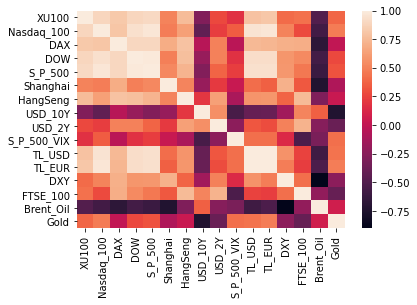

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
X = df.iloc[:,1:19] # degiskenler
X.head()
X= X.drop("Brent_Oil",axis=1)
X= X.drop("Gold",axis=1)
#X= X.drop("USD_10Y",axis=1)
#X= X.drop("DXY",axis=1)
#X= X.drop("FTSE_100",axis=1)

X.head()

,Nasdaq_100,DAX,DOW,S_P_500,Shanghai,HangSeng,USD_10Y,USD_2Y,S_P_500_VIX,TL_USD,TL_EUR,DXY,FTSE_100,year,month,day
0,2329.71,6111.55,12418.42,1277.30,2169.39,18727.31,1.984,0.263,22.22,1.8785,2.4314,80.13,5668.45,2012,1,4
1,2348.98,6095.99,12415.70,1281.06,2148.45,18813.41,1.996,0.263,21.48,1.8830,2.4072,80.94,5624.26,2012,1,5
2,2356.17,6057.92,12359.92,1277.81,2163.39,18593.06,1.958,0.260,20.63,1.8776,2.3883,81.25,5649.68,2012,1,6
3,2350.65,6017.23,12392.69,1280.70,2225.89,18865.72,1.956,0.248,21.07,1.8680,2.3845,81.05,5612.26,2012,1,9
4,2367.38,6162.98,12462.47,1292.08,2285.74,19004.28,1.963,0.244,20.69,1.8686,2.3872,80.81,5696.70,2012,1,10


In [ ]:
Y = df.iloc[:,0] # Bist100
#Y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # %80 train

In [ ]:
#Random Forest Regresyonu
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 200,random_state=42)
rf_reg.fit(X_train,y_train.ravel())
y_pred =rf_reg.predict(X_test)

In [ ]:
y_pred[-1]

1076.2701500000012

In [ ]:
y_test.tail(1)

1835    1077.88
Name: XU100, dtype: float64

In [ ]:
a=100*abs(y_test-y_pred)/abs(y_test)
print("RFR MAPE değeri",a.sum()/len(a),"dir.")

RFR MAPE değeri 1.4893001648135575 dir.


In [ ]:
print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))


Random Forest R2 degeri
0.9968232862744146


In [ ]:

test['time'] = pd.to_datetime(test['Date'])
test['date'] = test['time'].map(lambda x: x.strftime('%Y-%m-%d'))
test['year'] = test['time'].dt.year
test['month'] = test['time'].dt.month
test['day'] = test['time'].dt.day
test['day_of_week'] = test['time'].dt.dayofweek
test["quater"] = test["time"].dt.quarter
week = test["time"].dt.isocalendar()
test["week"] = week["week"].astype(int)

In [ ]:
test =test.drop("Date",axis=1)
test =test.drop("time",axis=1)
test =test.drop("date",axis=1)


test =test.drop("quater",axis=1)
test =test.drop("week",axis=1)
#test =test.drop("year",axis=1)
#test =test.drop("month",axis=1)
#test =test.drop("day",axis=1)
#test =test.drop("day_of_week",axis=1)
#test.tail()

In [ ]:
X_test=test[['Nasdaq_100','DAX','DOW','S_P_500','Shanghai','HangSeng','USD_10Y','USD_2Y','S_P_500_VIX','TL_USD','TL_EUR',"DXY" ,"FTSE_100",'year',"month", "day" ]]

In [ ]:
y_tahmin=rf_reg.predict(X_test)

In [ ]:
#a=100*abs(y_tahmin-test['XU100'])/abs(test['XU100'])
#print("MAPE değeri",a.sum()/len(a),"dir.")

In [ ]:
test["Predict"]=y_tahmin

In [ ]:
test["Last_Close"]= XU_100['Close'].tail(1).values
Piyasa = test["Last_Close"] > test["Predict"]
test

,XU100_Close,Nasdaq_100,S_P_500,DOW,DAX,Shanghai,HangSeng,S_P_500_VIX,USD_10Y,USD_2Y,TL_USD,TL_EUR,DXY,FTSE_100,Brent_Oil,Gold,year,month,day,day_of_week,Predict,Last_Close
0,1416.55,13758.5,4097.17,33503.57,15202.68,3450.29,28608.87,16.95,1.657,0.157,8.1597,9.7016,92.29,6942.22,63.02,1748.4,2021,4,9,4,1414.562,1416.55


In [ ]:
if Piyasa.bool()==False:
    print("Piyasa Pozitif !")
else:
    print("Piyasa Negatif !")

Piyasa Negatif !


In [ ]:

sonuc=test[["year",'month','day',"Predict",'Last_Close']]
sonuc

,year,month,day,Predict,Last_Close
0,2021,4,9,1414.562,1416.55
